In [1]:
import pandas as pd
import numpy as np
import csv 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Astma XLSX to csv
astma ='asthma_CF_share.xlsx'
astmaXLSX = pd.read_excel(astma)
astmaXLSX.to_csv('astma.csv', index = None, header=True)

# Read csv
astma_df = pd.read_csv('astma.csv')

In [4]:
# Define cols
colnames = ["Index","SubjectNr","DayNo","weekday","dayType","Age","sex","weight","height","BMI_SDS","ethnicity",
           "school_year_final","sportsyesno","urbanisation","PedsQL_score_baseline","stepsTotalDaily","steps_hour_max",
           "steps00","steps01","steps02","steps03","steps04","steps05","steps06","steps07","steps08","steps09","steps10",
           "steps11","steps12","steps13","steps14","steps15","steps16","steps17","steps18","steps19","steps20","steps21",
           "steps22","steps23","HR05Perc","HR95Perc","HRMinSleep","HRMaxSleep","AVGHR_daily","AVGHR_sleep","AVGHR_wake",
           "HR00","HR01","HR02","HR03","HR04","HR05","HR06","HR07","HR08","HR09","HR10","HR11","HR12","HR13","HR14","HR15",
           "HR16","HR17","HR18","HR19","HR20","HR21","HR22","HR23","wear05H","wear16H","wear24H","BODY_TEMPERATURE_DEG_C",
           "DIASTOLIC_BLOOD_PRESSURE_MMHG","HEART_PULSE_BPM","SYSTOLIC_BLOOD_PRESSURE_MMHG","WEIGHT_KG","awakeDuration",
           "lightSleepDuration","deepSleepDuration","wakeUpCount","sleeptime","waketime","fvc_best","fev1_best","pef_best",
           "grade_fev1","grade_fvc","predicted_fvc_best","predicted_fev1_best","predicted_fev1_ratio_best","fev1_ratio_best",
           "fev1_percentage","fvc1_percentage","fev1_ratio_percentage","school_yes_no","screentime","FG","FHX","FHN","TG","TN",
           "TX","SQ","SP","DR","RH","RHX"]

# This removes the "" in health csv file
rows = []
with open("healthy_share.csv") as file:
    for l in csv.reader(file, quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL, skipinitialspace=True):
        rows.append(''.join(l).split(','))

# Removes colum list from data rows
rows.pop(0)

healthy_df = pd.DataFrame(rows, columns=colnames)

In [5]:
print(astma_df.head(10))

   Unnamed: 0  SubjectNr  DayNo weekday  dayType  stepsTotalDaily  \
0  1           1771258    0      Tue     school   3723.0            
1  2           1771258    1      Wed     school   10015.0           
2  3           1771258    2      Thu     school   3811.0            
3  4           1771258    3      Fri     school   4346.0            
4  5           1771258    4      Sat     weekend  3270.0            
5  6           1771258    5      Sun     weekend  4697.0            
6  7           1771258    6      Mon     school   4574.0            
7  8           1771258    7      Tue     school   7244.0            
8  9           1771258    8      Wed     school   9796.0            
9  10          1771258    9      Thu     school   5447.0            

   stepsTotalDetailed  steps00  steps01  steps02  steps03  steps04  steps05  \
0  3723.0             NaN      NaN      NaN      NaN      NaN      NaN        
1  10015.0            NaN      NaN      NaN      NaN      NaN      NaN        
2  

In [6]:
print(healthy_df.head(10))

  Index SubjectNr DayNo weekday    dayType Age       sex weight height  \
0  1     2853189   0     "Thu"   "holiday"  2   "Female"  12     92      
1  2     2853189   1     "Fri"   "holiday"  2   "Female"  12     92      
2  3     2853189   2     "Sat"   "holiday"  2   "Female"  12     92      
3  4     2853189   3     "Sun"   "holiday"  2   "Female"  12     92      
4  5     2853189   4     "Mon"   "school"   2   "Female"  12     92      
5  6     2853189   5     "Tue"   "school"   2   "Female"  12     92      
6  7     2853189   6     "Wed"   "school"   2   "Female"  12     92      
7  8     2853189   7     "Thu"   "school"   2   "Female"  12     92      
8  9     2853189   8     "Fri"   "school"   2   "Female"  12     92      
9  10    2853189   9     "Sat"   "weekend"  2   "Female"  12     92      

  BMI_SDS        ethnicity school_year_final sportsyesno  \
0  -1.8    "Other / Mixed"  "Day care"        "No"         
1  -1.8    "Other / Mixed"  "Day care"        "No"         
2  -1

In [7]:
astma_cols = astma_df.columns.tolist()
healthy_cols = healthy_df.columns.tolist()

common_list = set(astma_cols).intersection(healthy_cols)
print("variables in common:")
print("Length: " + str(len(common_list)))
print(common_list)
print()

print("variables exclusive to astma patients:")
exclusive_list = set(astma_cols).symmetric_difference(set(healthy_cols))
print("Length: " + str(len(exclusive_list)))
print(exclusive_list)

variables in common:
Length: 91
{'HR01', 'grade_fvc', 'fev1_ratio_best', 'HR00', 'HR13', 'HR02', 'HRMaxSleep', 'lightSleepDuration', 'HR17', 'HR22', 'awakeDuration', 'steps02', 'HR95Perc', 'Age', 'HR08', 'FHX', 'steps07', 'steps14', 'fev1_percentage', 'AVGHR_sleep', 'HR05Perc', 'deepSleepDuration', 'HRMinSleep', 'steps10', 'SQ', 'steps13', 'wear24H', 'steps12', 'HR10', 'HR05', 'steps09', 'steps15', 'DayNo', 'SubjectNr', 'HR11', 'steps01', 'steps17', 'steps23', 'HR06', 'fev1_best', 'HR20', 'HR15', 'steps22', 'steps20', 'fvc_best', 'HR12', 'pef_best', 'fev1_ratio_percentage', 'HR21', 'TN', 'HR09', 'BMI_SDS', 'HR04', 'SP', 'steps19', 'HR23', 'HR16', 'AVGHR_daily', 'steps05', 'DR', 'dayType', 'steps04', 'FHN', 'steps08', 'steps18', 'HR19', 'RH', 'fvc1_percentage', 'FG', 'HR07', 'school_yes_no', 'AVGHR_wake', 'steps21', 'HR03', 'steps03', 'steps11', 'grade_fev1', 'steps00', 'steps16', 'TX', 'TG', 'screentime', 'stepsTotalDaily', 'steps_hour_max', 'wakeUpCount', 'wear16H', 'steps06', 'HR18',

In [8]:
# Todo 
# How to fill 141 columns to healthy patients? There is a great missmatch in data

In [9]:
# Data visualization and insights

In [10]:
# Healthy individuals

In [11]:
# DF contained string NA instead of nulls
healthy_df = healthy_df.replace('NA', np.nan)

# All columns are still of dtype object so we convert into best fit 
healthy_df = healthy_df.convert_dtypes().apply(pd.to_numeric, errors="ignore")
print(healthy_df.dtypes)

Index                            int64  
SubjectNr                        int64  
DayNo                            int64  
weekday                          object 
dayType                          object 
Age                              int64  
sex                              object 
weight                           float64
height                           float64
BMI_SDS                          float64
ethnicity                        object 
school_year_final                object 
sportsyesno                      object 
urbanisation                     object 
PedsQL_score_baseline            float64
stepsTotalDaily                  float64
steps_hour_max                   float64
steps00                          float64
steps01                          float64
steps02                          float64
steps03                          float64
steps04                          float64
steps05                          float64
steps06                          float64
steps07         

In [12]:
print("Rows (Recorded day): " + str(len(healthy_df.index)))
print("Number of healthy patiens: " + str(healthy_df.SubjectNr.nunique()))
print(str(len(healthy_df.index)/healthy_df.SubjectNr.nunique()) + " recorded day per person")

Rows (Recorded day): 3850
Number of healthy patiens: 175
22.0 recorded day per person


Ratio of nans per column


C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, 'steps16'),
  Text(1, 0, 'steps18'),
  Text(2, 0, 'steps15'),
  Text(3, 0, 'steps17'),
  Text(4, 0, 'weight'),
  Text(5, 0, 'BMI_SDS'),
  Text(6, 0, 'HR23'),
  Text(7, 0, 'steps12'),
  Text(8, 0, 'HR22'),
  Text(9, 0, 'HR21'),
  Text(10, 0, 'HR20'),
  Text(11, 0, 'steps11'),
  Text(12, 0, 'HR18'),
  Text(13, 0, 'steps19'),
  Text(14, 0, 'steps14'),
  Text(15, 0, 'steps13'),
  Text(16, 0, 'steps10'),
  Text(17, 0, 'HR19'),
  Text(18, 0, 'HR17'),
  Text(19, 0, 'HR08'),
  Text(20, 0, 'AVGHR_sleep'),
  Text(21, 0, 'HR16'),
  Text(22, 0, 'HR07'),
  Text(23, 0, 'HR06'),
  Text(24, 0, 'HR00'),
  Text(25, 0, 'HR15'),
  Text(26, 0, 'HR05'),
 

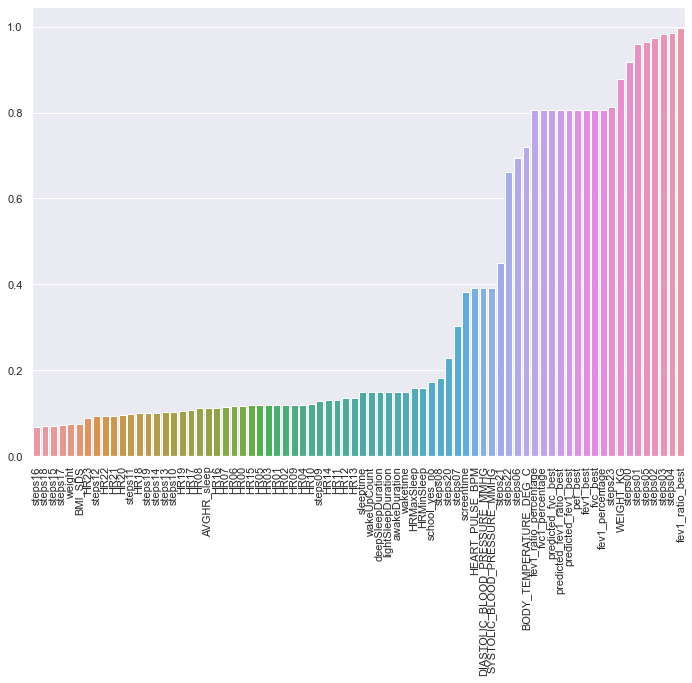

In [35]:
# Higher ratio is more missing values
print("Ratio of nans per column")
missing_data = (healthy_df.isnull().sum(axis=0)/3850).sort_values()
missing_data = missing_data[missing_data > 0.05]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(missing_data.index, missing_data.values)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Outliers Below or Above 25th/75th Percentile (Part 2)')

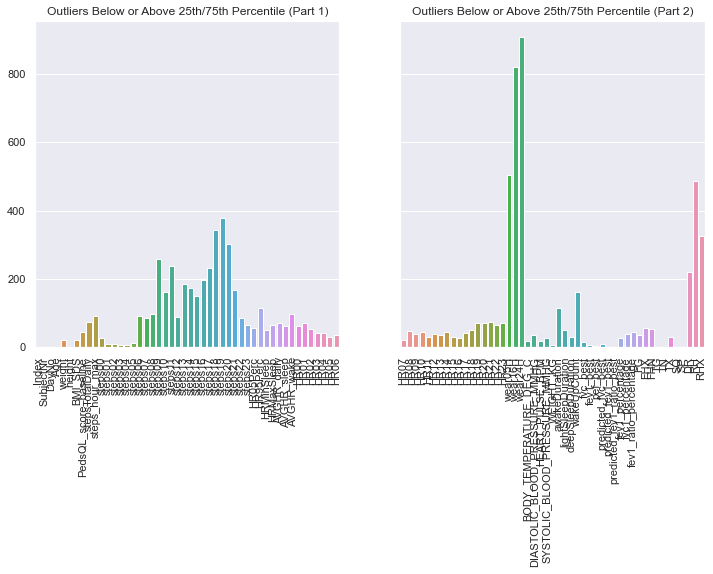

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume healthy_df is the input DataFrame

# Select only the numerical columns
numerical_cols = healthy_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the 25th and 75th percentiles for each numerical column
quantiles = healthy_df[numerical_cols].quantile([0.25, 0.75])

# Calculate the interquartile range (IQR) for each numerical column
iqr = quantiles.diff().iloc[-1]

# Calculate the lower and upper bounds for outliers for each numerical column
lower_bounds = quantiles.iloc[0] - 1.5 * iqr
upper_bounds = quantiles.iloc[1] + 1.5 * iqr

# Count the number of outliers below the lower bound and above the upper bound for each numerical column
outliers = (healthy_df[numerical_cols] < lower_bounds) | (healthy_df[numerical_cols] > upper_bounds)
outlier_counts = outliers.sum()

# Split the outlier counts into two halves to make the x-axis easier to read
halfway = int(len(outlier_counts) / 2)
outlier_counts_1 = outlier_counts[:halfway]
outlier_counts_2 = outlier_counts[halfway:]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the outlier counts in a bar chart using seaborn on the first subplot
sns.barplot(x=outlier_counts_1.index, y=outlier_counts_1.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Outliers Below or Above 25th/75th Percentile (Part 1)')

# Plot the outlier counts in a bar chart using seaborn on the second subplot
sns.barplot(x=outlier_counts_2.index, y=outlier_counts_2.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Outliers Below or Above 25th/75th Percentile (Part 2)')


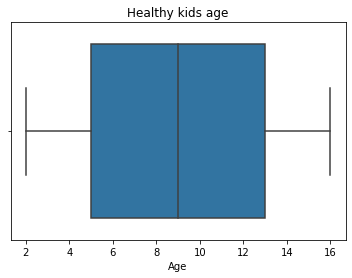

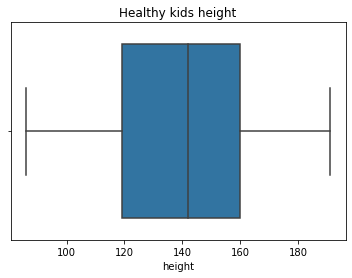

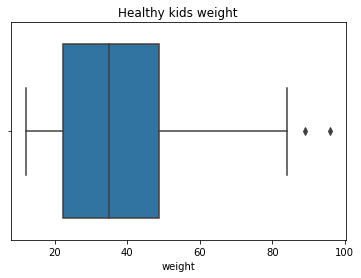

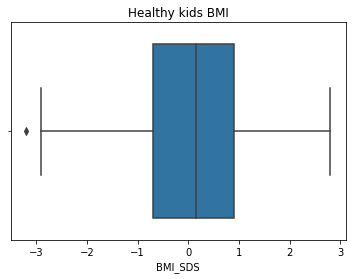

In [14]:
unique_subjects = healthy_df.drop_duplicates(subset=["SubjectNr"], keep='first')

sns.boxplot(data=unique_subjects, x=unique_subjects["Age"])
plt.title("Healthy kids age")
plt.show()

sns.boxplot(data=unique_subjects, x=unique_subjects["height"])
plt.title("Healthy kids height")
plt.show()

sns.boxplot(data=unique_subjects, x=unique_subjects["weight"])
plt.title("Healthy kids weight")
plt.show()

sns.boxplot(data=unique_subjects, x=unique_subjects["BMI_SDS"])
plt.title("Healthy kids BMI")
plt.show()

<AxesSubplot:xlabel='ethnicity', ylabel='Count'>

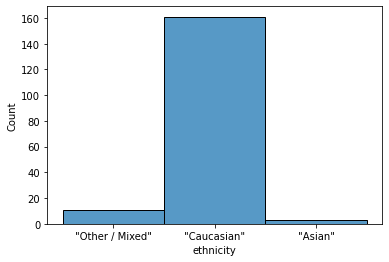

In [15]:
sns.histplot(data=unique_subjects, x="ethnicity")